In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Data/train.csv")

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#Today we will be binning the data so lets look at the spread

In [5]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Connors, Mr. Patrick",male,1601,G6,S
freq,1,577,7,4,644


In [6]:
df = df.drop(["Cabin"], axis = 1)

In [7]:
df = df.drop(["Name"], axis = 1)

In [8]:
df.describe(include='O')

,Sex,Ticket,Embarked
count,891,891,889
unique,2,681,3
top,male,1601,S
freq,577,7,644


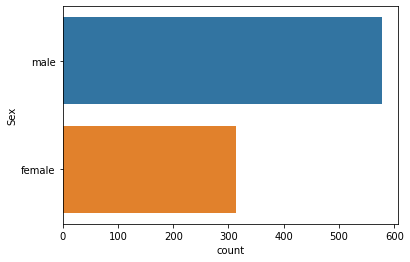

In [9]:
sns.countplot(y="Sex", data=df);

In [10]:
df = df.drop("Ticket", axis = 1)

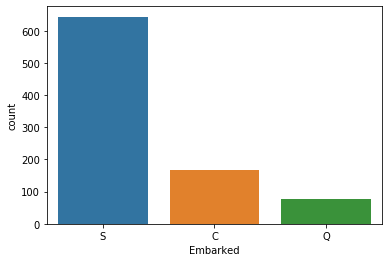

In [11]:
sns.countplot("Embarked", data = df)

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df = df.drop("PassengerId", axis = 1)

In [14]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


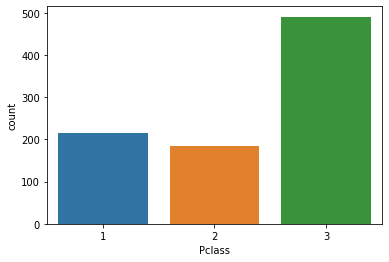

In [15]:
sns.countplot("Pclass", data = df)

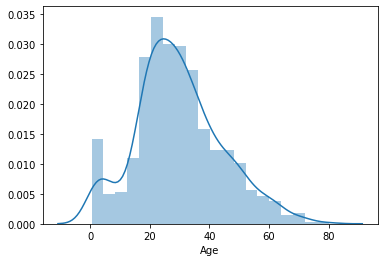

In [16]:
sns.distplot(df["Age"])

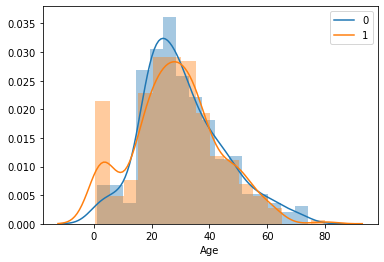

In [17]:
sns.distplot(df[df["Survived"] == 0]["Age"], kde_kws={"label":"0"})
sns.distplot(df[df["Survived"] == 1]["Age"], kde_kws={"label":"1"})

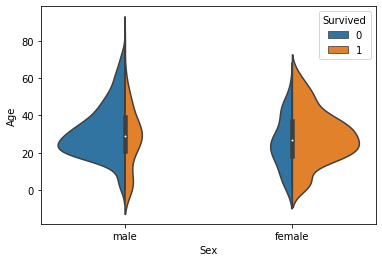

In [18]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, scale='count');

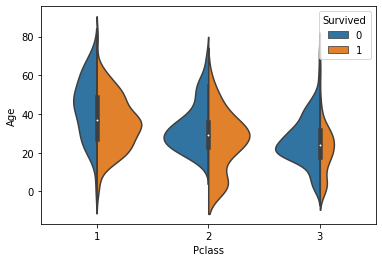

In [19]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, scale='count');

In [20]:
mean_fare = df["Fare"].mean()
fare_25 = np.nanpercentile(df["Age"], 25)
fare_50 = np.nanpercentile(df["Age"], 50)
fare_75 = np.nanpercentile(df["Age"], 75)

In [21]:
df["Fare_amm"] = df["Fare"].apply(lambda x: 2 if x > fare_75 else (1 if  x > fare_50 else 0))

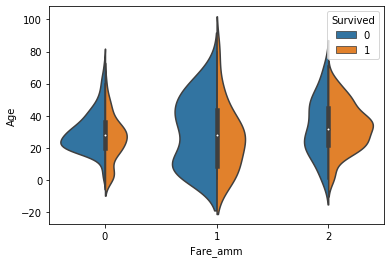

In [22]:
sns.violinplot(x='Fare_amm', y='Age', hue='Survived', data=df, split=True, scale='count');

In [23]:
#Observations
#First age vs gender
#Women divisions ->
# over 60
#60 to 40
#40 to 35
# 35 to 20
#20 to 15
#15 to 10
#10 to 0
# men divisions ->
# over 60
#60 to 40
#40 to 25 
#25 to 18
#18 to 10
#10 to 0

#Passenger Clasx
# Pclass 3 divisions ->
#over 42
#42 to 25
#25 to 15 
#15 to 10
#10 to 0 
#Plcass 2 divisions -> 
#over 60
#60 to 40
#40 to 30
#30 to 25
#25 to 20
#20 to 15
#15 yo 0
#Pclass 1 divisions ->
#over 70
#70 to 55
#55 to 35
#35 to 20
#20 to 10
#10 to 0


In [24]:
#Women age
df["Womeno60"] =df.apply(lambda x: 1 if (x.Sex == "female" and x.Age >= 60) else 0, axis=1)
df["Women6040"] =df.apply(lambda x: 1 if (x.Sex == "female" and x.Age < 60 and x.Age >= 40) else 0, axis=1)
df["Women4035"] =df.apply(lambda x: 1 if (x.Sex == "female" and x.Age < 40 and x.Age >= 35) else 0, axis=1)
df["Women3520"] =df.apply(lambda x: 1 if (x.Sex == "female" and x.Age < 35 and x.Age >= 20) else 0, axis=1)
df["Women2015"] =df.apply(lambda x: 1 if (x.Sex == "female" and x.Age < 20 and x.Age >= 15) else 0, axis=1)
df["Women1510"] =df.apply(lambda x: 1 if (x.Sex == "female" and x.Age < 15 and x.Age >= 10) else 0, axis=1)
df["Womenu10"] =df.apply(lambda x: 1 if (x.Sex == "female" and x.Age < 10) else 0, axis=1)


In [25]:
#Men age
df["Meno60"] =df.apply(lambda x: 1 if (x.Sex == "male" and x.Age >= 60) else 0, axis=1)
df["Men6040"] =df.apply(lambda x: 1 if (x.Sex == "male" and x.Age < 60 and x.Age >= 40) else 0, axis=1)
df["Men4025"] =df.apply(lambda x: 1 if (x.Sex == "male" and x.Age < 40 and x.Age >= 35) else 0, axis=1)
df["Men2518"] =df.apply(lambda x: 1 if (x.Sex == "male" and x.Age < 25 and x.Age >= 18) else 0, axis=1)
df["Men1810"] =df.apply(lambda x: 1 if (x.Sex == "male" and x.Age < 15 and x.Age >= 10) else 0, axis=1)
df["Menu10"] =df.apply(lambda x: 1 if (x.Sex == "male" and x.Age < 10) else 0, axis=1)


In [26]:
#Pclass 3 age
df["Class3o42"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Age >= 42) else 0, axis=1)
df["Class34225"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Age < 42 and x.Age >= 25) else 0, axis=1)
df["Class32515"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Age < 25 and x.Age >= 15) else 0, axis=1)
df["Class31510"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Age < 15 and x.Age >= 10) else 0, axis=1)
df["Class3u10"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Age < 10) else 0, axis=1)


In [27]:
#Pclass 2 age
df["Class2o60"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Age >= 60) else 0, axis=1)
df["Class26040"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Age < 60 and x.Age >= 40) else 0, axis=1)
df["Class24030"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Age < 40 and x.Age >= 30) else 0, axis=1)
df["Class23025"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Age < 30 and x.Age >= 25) else 0, axis=1)
df["Class22520"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Age < 25 and x.Age >= 20) else 0, axis=1)
df["Class22015"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Age < 20 and x.Age >= 15) else 0, axis=1)
df["Class2u15"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Age < 15 ) else 0, axis=1)


In [28]:
#Pclass 1 age
df["Class1o70"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Age >= 70) else 0, axis=1)
df["Class17055"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Age < 70 and x.Age >= 55) else 0, axis=1)
df["Class15535"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Age < 55 and x.Age >= 35) else 0, axis=1)
df["Class13520"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Age < 35 and x.Age >= 20) else 0, axis=1)
df["Class12010"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Age < 20 and x.Age >= 10) else 0, axis=1)
df["Class1u10"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Age < 10 ) else 0, axis=1)

In [29]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Fare_amm', 'Womeno60', 'Women6040', 'Women4035',
       'Women3520', 'Women2015', 'Women1510', 'Womenu10', 'Meno60', 'Men6040',
       'Men4025', 'Men2518', 'Men1810', 'Menu10', 'Class3o42', 'Class34225',
       'Class32515', 'Class31510', 'Class3u10', 'Class2o60', 'Class26040',
       'Class24030', 'Class23025', 'Class22520', 'Class22015', 'Class2u15',
       'Class1o70', 'Class17055', 'Class15535', 'Class13520', 'Class12010',
       'Class1u10'],
      dtype='object')

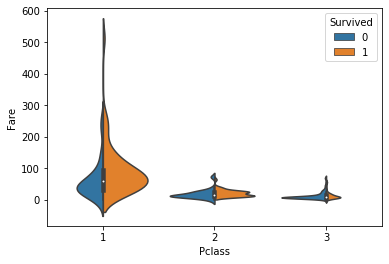

In [30]:
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=df, split=True, scale='count');

In [31]:
fare_90 = np.nanpercentile(df["Fare"], 95)
df["bet_Fare"] = df["Fare"].apply(lambda x: fare_90 if x > fare_90 else x)

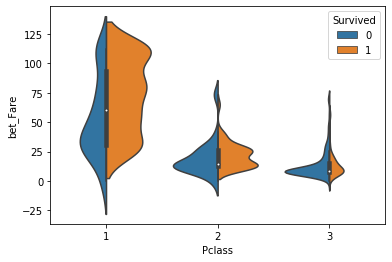

In [32]:
sns.violinplot(x='Pclass', y='bet_Fare', hue='Survived', data=df, split=True, scale='count');

In [33]:
#Insight Fare vs Class
#Class 3 divisions
#over 50
#50 to 25
#25 to 20
#15 to 10
#10 to 8
#under 8

#Class 2 divisions
#over 75
#75 to 60
#60 to 40
#40 to 30
#30 to 20
#20 to 15
#15 to 5
#under 5

#class 1 divisions
#over 120
#120 to 100
#100 to 80
#80 to 70
#70 to 50
#50 to 25
#25 to 20
#20 to 15
#under 15


In [34]:
#Class 3 Fare
df["Class3Fo50"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Fare >= 50) else 0, axis=1)
df["Class3F5025"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Fare < 50 and x.Fare >= 25) else 0, axis=1)
df["Class3F2520"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Fare < 25 and x.Fare >= 20) else 0, axis=1)
df["Class3F2015"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Fare < 20 and x.Fare >= 15) else 0, axis=1)
df["Class3F1510"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Fare < 15 and x.Fare >= 10) else 0, axis=1)
df["Class3F108"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Fare < 10 and x.Fare >= 8) else 0, axis=1)
df["Class3Fu8"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Fare < 8 ) else 0, axis=1)

In [35]:
#Class 2 Fare
df["Class2Fo75"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Fare >= 75) else 0, axis=1)
df["Class2F7560"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Fare < 75 and x.Fare >= 60) else 0, axis=1)
df["Class2F6040"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Fare < 60 and x.Fare >= 40) else 0, axis=1)
df["Class2F4030"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Fare < 40 and x.Fare >= 30) else 0, axis=1)
df["Class2F3020"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Fare < 30 and x.Fare >= 20) else 0, axis=1)
df["Class2F2015"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Fare < 20 and x.Fare >= 15) else 0, axis=1)
df["Class2Fu15"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Fare < 15 ) else 0, axis=1)

In [36]:
#Class 1 Fare
df["Class1Fo120"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare >= 120) else 0, axis=1)
df["Class1F120100"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 120 and x.Fare >= 100) else 0, axis=1)
df["Class1F10080"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 100 and x.Fare >= 80) else 0, axis=1)
df["Class1F8070"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 80 and x.Fare >= 70) else 0, axis=1)
df["Class1F7050"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 70 and x.Fare >= 50) else 0, axis=1)
df["Class1F5025"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 50 and x.Fare >= 25) else 0, axis=1)
df["Class1F2520"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 25 and x.Fare >= 20) else 0, axis=1)
df["Class1F2015"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 20 and x.Fare >= 15) else 0, axis=1)
df["Class1Fu15"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 15 ) else 0, axis=1)

In [37]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Fare_amm', 'Womeno60', 'Women6040', 'Women4035',
       'Women3520', 'Women2015', 'Women1510', 'Womenu10', 'Meno60', 'Men6040',
       'Men4025', 'Men2518', 'Men1810', 'Menu10', 'Class3o42', 'Class34225',
       'Class32515', 'Class31510', 'Class3u10', 'Class2o60', 'Class26040',
       'Class24030', 'Class23025', 'Class22520', 'Class22015', 'Class2u15',
       'Class1o70', 'Class17055', 'Class15535', 'Class13520', 'Class12010',
       'Class1u10', 'bet_Fare', 'Class3Fo50', 'Class3F5025', 'Class3F2520',
       'Class3F2015', 'Class3F1510', 'Class3F108', 'Class3Fu8', 'Class2Fo75',
       'Class2F7560', 'Class2F6040', 'Class2F4030', 'Class2F3020',
       'Class2F2015', 'Class2Fu15', 'Class1Fo120', 'Class1F120100',
       'Class1F10080', 'Class1F8070', 'Class1F7050', 'Class1F5025',
       'Class1F2520', 'Class1F2015', 'Class1Fu15'],
      dtype='object')

In [38]:
#lets bin age and fare

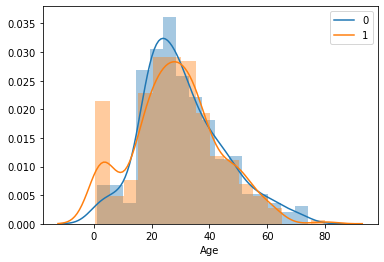

In [39]:
sns.distplot(df[df["Survived"] == 0]["Age"], kde_kws={"label":"0"})
sns.distplot(df[df["Survived"] == 1]["Age"], kde_kws={"label":"1"})

In [40]:
df["Age_class"] = df["Age"].apply(lambda x: 1 if x <= 10 else 0)
df["Age_class"] = df.apply(lambda x: 2 if x.Age > 10 and x.Age <= 20 else x.Age_class, axis =1)
df["Age_class"] = df.apply(lambda x: 3 if x.Age > 20 and x.Age <= 25 else x.Age_class, axis =1) #20 to 25???
df["Age_class"] = df.apply(lambda x: 4 if x.Age > 25 and x.Age <= 35 else x.Age_class, axis =1)
df["Age_class"] = df.apply(lambda x: 5 if x.Age > 35 and x.Age <= 40 else x.Age_class, axis =1)
df["Age_class"] = df.apply(lambda x: 6 if x.Age > 40 and x.Age <= 50 else x.Age_class, axis =1)
df["Age_class"] = df.apply(lambda x: 7 if x.Age > 50 and x.Age <= 60 else x.Age_class, axis =1)
df["Age_class"] = df.apply(lambda x: 4 if x.Age > 60 else x.Age_class,axis =1)

In [41]:
df["Age_class"].value_counts()

4    218
0    177
3    122
2    115
6     86
5     67
1     64
7     42
Name: Age_class, dtype: int64

In [42]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Fare_amm', 'Womeno60', 'Women6040', 'Women4035',
       'Women3520', 'Women2015', 'Women1510', 'Womenu10', 'Meno60', 'Men6040',
       'Men4025', 'Men2518', 'Men1810', 'Menu10', 'Class3o42', 'Class34225',
       'Class32515', 'Class31510', 'Class3u10', 'Class2o60', 'Class26040',
       'Class24030', 'Class23025', 'Class22520', 'Class22015', 'Class2u15',
       'Class1o70', 'Class17055', 'Class15535', 'Class13520', 'Class12010',
       'Class1u10', 'bet_Fare', 'Class3Fo50', 'Class3F5025', 'Class3F2520',
       'Class3F2015', 'Class3F1510', 'Class3F108', 'Class3Fu8', 'Class2Fo75',
       'Class2F7560', 'Class2F6040', 'Class2F4030', 'Class2F3020',
       'Class2F2015', 'Class2Fu15', 'Class1Fo120', 'Class1F120100',
       'Class1F10080', 'Class1F8070', 'Class1F7050', 'Class1F5025',
       'Class1F2520', 'Class1F2015', 'Class1Fu15', 'Age_class'],
      dtype='object')

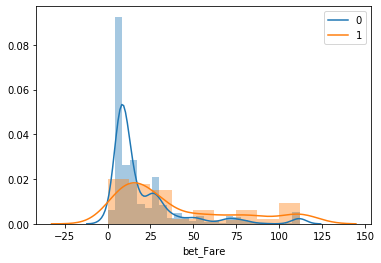

In [43]:
sns.distplot(df[df["Survived"] == 0]["bet_Fare"], kde_kws={"label":"0"})
sns.distplot(df[df["Survived"] == 1]["bet_Fare"], kde_kws={"label":"1"})

In [44]:
df["Fare_class"] =df["Fare"].apply(lambda x: 1 if (x >= 0 and x <= 20) else 0)
df["Fare_class"] =df.apply(lambda x: 2 if (x.Fare >= 5 and x.Fare <= 25) else x.Fare_class, axis = 1)
df["Fare_class"] =df.apply(lambda x: 3 if (x.Fare >= 25 and x.Fare <= 30) else x.Fare_class, axis = 1)
df["Fare_class"] =df.apply(lambda x: 4 if (x.Fare >= 30 and x.Fare <= 50) else x.Fare_class, axis = 1)
df["Fare_class"] =df.apply(lambda x: 5 if (x.Fare >= 50 and x.Fare <= 60) else x.Fare_class, axis = 1)
df["Fare_class"] =df.apply(lambda x: 6 if (x.Fare >= 60 and x.Fare <= 80) else x.Fare_class, axis = 1)
df["Fare_class"] =df.apply(lambda x: 7 if (x.Fare >= 80 and x.Fare <= 100) else x.Fare_class, axis = 1)
df["Fare_class"] =df.apply(lambda x: 8 if (x.Fare >= 100 and x.Fare <= 110) else x.Fare_class, axis = 1)
df["Fare_class"] =df.apply(lambda x: 9 if (x.Fare >= 110 and x.Fare <= 125) else x.Fare_class, axis = 1)
df["Fare_class"] =df.apply(lambda x: 10 if (x.Fare >= 125) else x.Fare_class, axis = 1)


In [45]:
df["Fare_class"].value_counts()

2     541
3      94
4      79
6      46
5      39
10     38
7      23
1      16
9      11
8       4
Name: Fare_class, dtype: int64

In [46]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Fare_amm', 'Womeno60', 'Women6040', 'Women4035',
       'Women3520', 'Women2015', 'Women1510', 'Womenu10', 'Meno60', 'Men6040',
       'Men4025', 'Men2518', 'Men1810', 'Menu10', 'Class3o42', 'Class34225',
       'Class32515', 'Class31510', 'Class3u10', 'Class2o60', 'Class26040',
       'Class24030', 'Class23025', 'Class22520', 'Class22015', 'Class2u15',
       'Class1o70', 'Class17055', 'Class15535', 'Class13520', 'Class12010',
       'Class1u10', 'bet_Fare', 'Class3Fo50', 'Class3F5025', 'Class3F2520',
       'Class3F2015', 'Class3F1510', 'Class3F108', 'Class3Fu8', 'Class2Fo75',
       'Class2F7560', 'Class2F6040', 'Class2F4030', 'Class2F3020',
       'Class2F2015', 'Class2Fu15', 'Class1Fo120', 'Class1F120100',
       'Class1F10080', 'Class1F8070', 'Class1F7050', 'Class1F5025',
       'Class1F2520', 'Class1F2015', 'Class1Fu15', 'Age_class', 'Fare_class'],
      dtype='object')

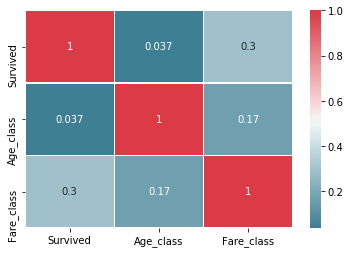

In [47]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[["Survived","Age_class", "Fare_class"]].corr(), linewidths=.5, cmap = cmap, annot=True)

In [48]:
df = df.drop("Age", axis = 1)
df = df.drop("Fare", axis = 1)
df = df.drop("Fare_amm", axis = 1)
df = df.drop("bet_Fare", axis = 1)

In [49]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Womeno60',
       'Women6040', 'Women4035', 'Women3520', 'Women2015', 'Women1510',
       'Womenu10', 'Meno60', 'Men6040', 'Men4025', 'Men2518', 'Men1810',
       'Menu10', 'Class3o42', 'Class34225', 'Class32515', 'Class31510',
       'Class3u10', 'Class2o60', 'Class26040', 'Class24030', 'Class23025',
       'Class22520', 'Class22015', 'Class2u15', 'Class1o70', 'Class17055',
       'Class15535', 'Class13520', 'Class12010', 'Class1u10', 'Class3Fo50',
       'Class3F5025', 'Class3F2520', 'Class3F2015', 'Class3F1510',
       'Class3F108', 'Class3Fu8', 'Class2Fo75', 'Class2F7560', 'Class2F6040',
       'Class2F4030', 'Class2F3020', 'Class2F2015', 'Class2Fu15',
       'Class1Fo120', 'Class1F120100', 'Class1F10080', 'Class1F8070',
       'Class1F7050', 'Class1F5025', 'Class1F2520', 'Class1F2015',
       'Class1Fu15', 'Age_class', 'Fare_class'],
      dtype='object')

In [50]:
df["Embarked"] = df["Embarked"].apply(lambda x: "S" if pd.isnull(x) else x)

In [51]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [55]:
df_dummies = pd.get_dummies(df)

In [58]:
df_dummies.columns 

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Womeno60', 'Women6040',
       'Women4035', 'Women3520', 'Women2015', 'Women1510', 'Womenu10',
       'Meno60', 'Men6040', 'Men4025', 'Men2518', 'Men1810', 'Menu10',
       'Class3o42', 'Class34225', 'Class32515', 'Class31510', 'Class3u10',
       'Class2o60', 'Class26040', 'Class24030', 'Class23025', 'Class22520',
       'Class22015', 'Class2u15', 'Class1o70', 'Class17055', 'Class15535',
       'Class13520', 'Class12010', 'Class1u10', 'Class3Fo50', 'Class3F5025',
       'Class3F2520', 'Class3F2015', 'Class3F1510', 'Class3F108', 'Class3Fu8',
       'Class2Fo75', 'Class2F7560', 'Class2F6040', 'Class2F4030',
       'Class2F3020', 'Class2F2015', 'Class2Fu15', 'Class1Fo120',
       'Class1F120100', 'Class1F10080', 'Class1F8070', 'Class1F7050',
       'Class1F5025', 'Class1F2520', 'Class1F2015', 'Class1Fu15', 'Age_class',
       'Fare_class', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [59]:
df_dummies.to_csv('Data/train_cat.csv')